In [36]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

EXP_NAME = "18202"

MAX_ROUNDS = 70
MAX_YVAL = 5

RESULTS_DIR = os.path.join( os.getcwd(),'results')

headers = ['time', 'elapsed', 'remotehost', 'code/status','bytes','method','URL','rfc931', 'peerstatus/peerhost',
           'type'] 
headers = ['time', 'elapsed', 'remotehost', 'bytes']
dtypes = [pd.datetime, float, float]

##SET SEABORN STYLE
sns.set_style("whitegrid")
sns.set_context("paper")

##SET MATPLOTLIB STYLE
TICKS_FONTSIZE = 16
LABEL_FONTSIZE=18
LEGEND_FONTSIZE=15
linestyles = (':','-','.','--')

mpl.rcParams['xtick.labelsize'] = TICKS_FONTSIZE 
mpl.rcParams['ytick.labelsize'] = TICKS_FONTSIZE
mpl.rcParams['legend.fontsize'] = TICKS_FONTSIZE
mpl.rcParams['axes.labelsize'] = LABEL_FONTSIZE
mpl.rcParams['axes.titlesize'] = LABEL_FONTSIZE
mpl.rcParams['font.size'] = LABEL_FONTSIZE
plt.rc('legend',**{'fontsize':LEGEND_FONTSIZE})


#Read input files from the directory and returns DataTable object in a combined list
def read_inputs(flag):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    #dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR, f))]
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isfile(os.path.join(INPUT_DIR, f))]
    #print(dirs)
    #Load results from each node
    nodes_results = pd.DataFrame()
    for node in dirs:
        #nodes = [f for f in os.listdir(INPUT_DIR+'/'+sub_dir) if os.path.isfile(os.path.join(INPUT_DIR+'/'+sub_dir, f))]
        #for node in nodes:
        file =''
        file = os.path.join(INPUT_DIR,node)
        #else:
        #    continue
        try:
            temp = pd.read_csv(file, sep=' ', header=None, encoding='ISO-8859–1', usecols = [0,1,2,4])
            temp.columns = headers
            temp['time'] = pd.to_datetime(temp['time'], unit='s')
            temp.set_index('time')

            
            nodes_results = nodes_results.append(temp)
        except Exception:
            print(node, 'EXception')
    return nodes_results
   
nodes_all = read_inputs(2)

18202_20150226_access_0.log EXception


In [15]:
#nodes_all.head()
nodes_all['elapsed'] = nodes_all['elapsed']/1000
nodes_all['elapsed'] = nodes_all['elapsed']/60
nodes_all = nodes_all.set_index('time')
#print(nodes_all['elapsed'].describe())

In [ ]:
data = nodes_all.resample('1H')['remotehost'].nunique()

In [17]:
#print(data)
data.to_csv('daily_unique_user_count.csv')

In [25]:
data.columns = {'time','unique'}
print(data[1].mean())

54.0


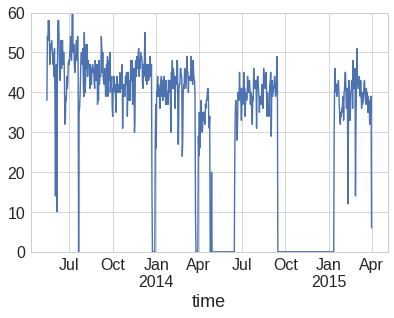

In [20]:
data.plot()
plt.ylim(0,60)
plt.show()

In [168]:
#Generating a new df with total continous elapsed time of the client
ips = nodes_all['remotehost'].unique()
#ips.top(5)

In [1]:
avg = 0
for ip in ips[0:5]:
    #print(ip)
    user_df = nodes_all.query('remotehost == "'+ip+'"')    
    #print(user_df.describe())
    #user_df = user_df.set_index('time')
    hourly = user_df.resample('1H').sum()
    print(hourly['elapsed'].mean())
    
#print(avg/len(ips))    

NameError: name 'ips' is not defined

In [175]:
from math import*
 
def square_rooted(x):
 
    return round(sqrt(sum([a*a for a in x])),3)
 
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)
 
print(cosine_similarity([3, 45, 7, 2], [2, 54, 13, 15]))

0.972


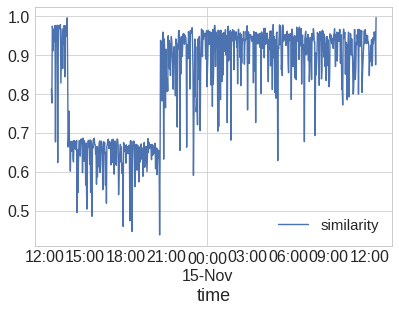

In [35]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

EXP_NAME = "similarity"

MAX_ROUNDS = 70
MAX_YVAL = 5

RESULTS_DIR = os.path.join( os.getcwd(),'results')

def read_inputs():
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isfile(os.path.join(INPUT_DIR, f))]
    nodes_results = pd.DataFrame()
    for node in dirs:
        file = os.path.join(INPUT_DIR,node)       
        try:
            temp = pd.read_csv(file, sep=',')
            temp['time'] = pd.to_datetime(temp['time'])
            nodes_results = nodes_results.append(temp)
            
        except Exception:
            print(node, 'EXception')
    return nodes_results
   
nodes_all = read_inputs()
nodes_all = nodes_all.set_index('time')
nodes_all = nodes_all.resample('2Min').mean()
nodes_all.plot()
plt.show()